In [6]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [17]:
data = pd.DataFrame(cities)
table = ['Country','Date','Temperature','lat','long','Humidity','Wind Speed','Cloudiness']
for i in table:
    data[i] = ""
data = data.rename(columns={0:"City"})
data.head()

,City,Country,Date,Temperature,lat,long,Humidity,Wind Speed,Cloudiness
0,taolanaro,,,,,,,,
1,kazalinsk,,,,,,,,
2,rikitea,,,,,,,,
3,busselton,,,,,,,,
4,carnarvon,,,,,,,,


In [26]:
base = "http://api.openweathermap.org/data/2.5/weather?"
parameters = {
    "units":"imperial",
    "APPID":api_key
}

city_number = 1
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in data.iterrows():
    name = row['City']
    parameters['q'] = name
    response = requests.get(base,params=parameters).json()
    try:
        print("Processing Record " + str(city_number) +":"+ str(name))
        data.loc[index,'Country'] = response['sys']['country']
        data.loc[index, 'Date']=response['dt']
        data.loc[index, 'Cloudiness']=response['clouds']['all']
        data.loc[index,'Temperature']=response['main']['temp_max']
        data.loc[index,'lat']=response['coord']['lat']
        data.loc[index,'long']=response['coord']['lon']
        data.loc[index,'Humidity']=response['main']['humidity']
        data.loc[index,'Wind Speed']=response['wind']['speed']
        data.loc[index, 'Cloudiness']=response['clouds']['all']
    except(KeyError):
        print("City not found. Skipping....")
    city_number +=1

Beginning Data Retrieval
-----------------------------
Processing Record 1:taolanaro
City not found. Skipping....
Processing Record 2:kazalinsk
City not found. Skipping....
Processing Record 3:rikitea
Processing Record 4:busselton
Processing Record 5:carnarvon
Processing Record 6:flic en flac
Processing Record 7:jiroft
City not found. Skipping....
Processing Record 8:port elizabeth
Processing Record 9:hobart
Processing Record 10:punta arenas
Processing Record 11:henties bay
Processing Record 12:cape town
Processing Record 13:vaini
Processing Record 14:lakatoro
Processing Record 15:grand river south east
City not found. Skipping....
Processing Record 16:finschhafen
Processing Record 17:mataura
Processing Record 18:thompson
Processing Record 19:karratha
Processing Record 20:ushuaia
Processing Record 21:sitka
Processing Record 22:bengkulu
City not found. Skipping....
Processing Record 23:port hedland
Processing Record 24:yomitan
City not found. Skipping....
Processing Record 25:mar del pl

In [27]:
data.count()

City           616
Country        616
Date           616
Temperature    616
lat            616
long           616
Humidity       616
Wind Speed     616
Cloudiness     616
dtype: int64

In [38]:
data.to_csv('outputs\data.csv',header = True)

In [39]:
data.head()

,City,Country,Date,Temperature,lat,long,Humidity,Wind Speed,Cloudiness
0,taolanaro,,,,,,,,
1,kazalinsk,,,,,,,,
2,rikitea,PF,1573954784,75.36,-23.12,-134.97,82,6.73,51
3,busselton,AU,1573954815,80.01,-33.64,115.35,38,11.39,0
4,carnarvon,ZA,1573954815,56.57,-30.97,22.13,80,12.64,0


In [43]:
missing = []
for index, row in data.iterrows():
    if row['Country'] == '' or row['Date'] == '' or row['Temperature'] == '' or row['lat'] == '' or row['long'] == '' or row['Humidity'] == '' or row['Wind Speed'] == '' or row['Cloudiness'] == '':
            missing.append(row['City'])
            
print(missing)
print(len(missing))

['taolanaro', 'kazalinsk', 'jiroft', 'grand river south east', 'bengkulu', 'yomitan', 'illoqqortoormiut', 'sahrak', 'belushya guba', 'palabuhanratu', 'lolua', 'halalo', 'yirol', 'attawapiskat', 'gurupa', 'mys shmidta', 'amderma', 'baboua', 'camana', 'gomel', 'tsihombe', 'maykain', 'kashi', 'umzimvubu', 'samusu', 'canaries', 'viligili', 'utiroa', 'tuggurt', 'ruatoria', 'ozgon', 'meyungs', 'saleaula', 'labrea', 'kuche', 'barentsburg', 'maneadero', 'alotau', 'tukrah', 'tumannyy', 'shaartuz', 'mutsamudu', 'jiddah', 'tabiauea', 'kracheh', 'grand centre', 'yanchukan', 'takob', 'nizhneyansk', 'fort saint john', 'yanan', 'linguere', 'chokwe', 'vaxjo', 'bolungarvik', 'sentyabrskiy', 'rungata', 'asau', 'kegayli', 'geresk', 'warqla', 'afgoye']
62


In [44]:
drop = []
for i in missing:
    city_index = data[data['City']==i].index
    drop.append(city_index)
    
data = data.drop(data.index[drop])
data.head()

,City,Country,Date,Temperature,lat,long,Humidity,Wind Speed,Cloudiness
2,rikitea,PF,1573954784,75.36,-23.12,-134.97,82,6.73,51
3,busselton,AU,1573954815,80.01,-33.64,115.35,38,11.39,0
4,carnarvon,ZA,1573954815,56.57,-30.97,22.13,80,12.64,0
5,flic en flac,MU,1573954816,75.99,-20.27,57.36,83,12.75,75
7,port elizabeth,US,1573954816,45,39.31,-74.98,32,11.41,90


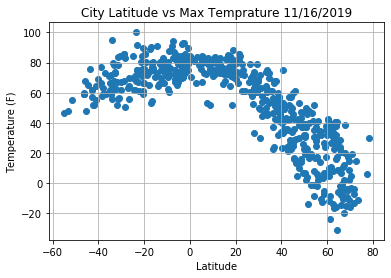

In [54]:
x_axis = data['lat']
temp = data['Temperature']
plt.scatter(x=x_axis, y=temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.title('City Latitude vs Max Temprature 11/16/2019')
plt.savefig('outputs/first.png')
plt.show()

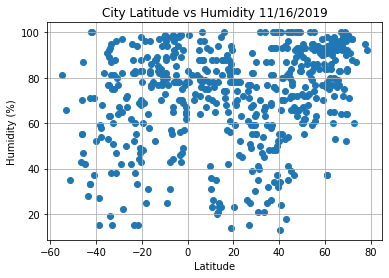

In [56]:
hum = data['Humidity']
plt.scatter(x=x_axis, y=hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs Humidity 11/16/2019')
plt.savefig('outputs/second.png')
plt.show()

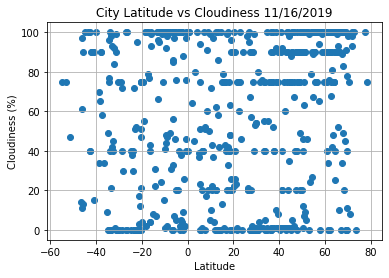

In [57]:
cloud = data['Cloudiness']

plt.scatter(x=x_axis, y=cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs Cloudiness 11/16/2019')
plt.savefig('outputs/third.png')
plt.show()

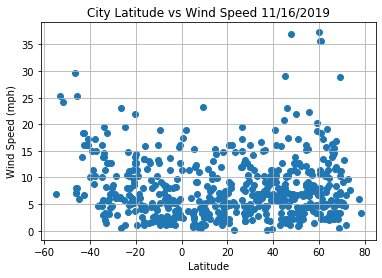

In [58]:
wind = data['Wind Speed']
plt.scatter(x=x_axis, y=wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs Wind Speed 11/16/2019')
plt.savefig('outputs/fourth.png')
plt.show()

Observations:
Looking at the latitude vs tempertature graph cities with a negative latitude (southern of the equator) have higher temperatures

However according to the cloudiness graph the closer we are to the equator the more cloudy it gets

and finally looking at the windspeed graph most cities around the world dont have extreme winds no matter where they are placed from the equator